Завдання 1. Для набору даних eng-climate-summaries-All-2_2015.csv
провести кластеризацію з використанням алгоритму DBSCAN.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 6.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.0 MB/s eta 0:0

                 Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...  NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  

[5 rows x 25 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 

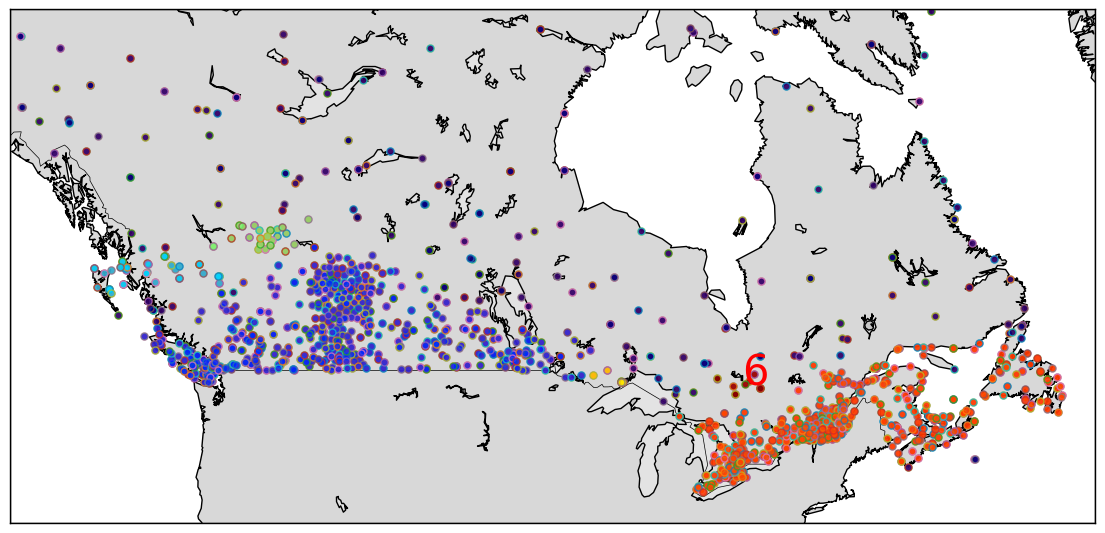

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import sklearn.utils

!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"
!pip install basemap
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import sklearn.utils
df = pd.read_csv('/content/sample_data/eng-climate-summaries-All-2_2015.csv')
n = 5  
print(df.head(n))

print(df.info())

df = df.dropna(how='all')
plt.figure(figsize=(14,10))
Long = [-140,-50] # Діапозон Довгота
Lat = [40,65] # Діапазон Широта

df = df[(df['Long'] > Long[0]) & (df['Long'] < Long[1]) & (df['Lat'] > Lat[0]) & (df['Lat'] < Lat[1])]
my_map = Basemap(projection='merc', resolution='l', area_thresh = 1000.0, llcrnrlon = Long[0], urcrnrlon = Long[1], llcrnrlat = Lat[0],urcrnrlat = Lat[1]
)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='grey',alpha=0.3)
my_map.shadedrelief()

# Отримати положення точок на карті за осями x і y за допомогою my_map
my_longs = df.Long.values
my_lats = df.Lat.values
X,Y = my_map(my_longs, my_lats)
df['xm'] = X
df['ym'] = Y

for (x,y) in zip(X,Y):
 my_map.plot(x,y,
 markerfacecolor=([1,0,0]),
 marker = 'o',
 markersize = 5,
 alpha = 0.75)

sklearn.utils.check_random_state(1000)
loc = [list(a) for a in zip(X,Y)]
loc = np.nan_to_num(loc)
scaler = StandardScaler()
loc = scaler.fit_transform(loc)

# Створити об’єкт DBSCAN
db = DBSCAN(eps=0.15, min_samples=10)
db.fit(loc)
mask = np.zeros_like(db.labels_, dtype=bool)
mask[db.core_sample_indices_] = True
labels = db.labels_ + 1

# Додати мітки до фрейму даних і переглянути вибірку кластерів
df['DBSCAN_L_Clusters'] = labels
df[["Stn_Name","Tx","Tm","DBSCAN_L_Clusters"]].head()
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels))))
for index,row in df.iterrows():
 my_map.plot(row.xm, row.ym,
 markerfacecolor=colors[row.DBSCAN_L_Clusters],
 marker = 'o',
 markersize = 5,
 alpha = 0.75
 )

# Мітки кластерів
for i in range(len(set(labels))):
 cluster = df[df.DBSCAN_L_Clusters == i][["Stn_Name","Tm","xm","ym","DBSCAN_L_Clusters"]]
 xc = np.mean(cluster.xm)
 yc = np.mean(cluster.ym)

# Отримайте середню температуру кластера
 Tavg = np.mean(cluster.Tm)

# Мітка кластера на карті
plt.text(xc,yc,str(i),fontsize=30,color='red')

# Вивести середні температури
print ("Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm)))


Завдання 2. Для заданого набору реалізувати алгоритм кластеризації
KMeans і одну з варіацій цього методу. Результати відобразити на карті.
Порівняти результати. 

In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import sklearn.utils

!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"
!pip install basemap
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import sklearn.utils
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

df = pd.read_csv('/content/sample_data/eng-climate-summaries-All-2_2015.csv')

Long = [-140, -50]  
Lat = [40, 65]  
first_point = df[['Lat', 'Long']].iloc[0]
last_point = df[['Lat', 'Long']].iloc[-1]
my_map = Basemap(projection='merc', resolution='l', area_thresh=1000.0, llcrnrlon=Long[0], urcrnrlon=Long[1], llcrnrlat=Lat[0], urcrnrlat=Lat[1])

X = df[['Long', 'Lat']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_
centroids_kmeans = scaler.inverse_transform(kmeans.cluster_centers_)
kmedoids = KMedoids(n_clusters=7, random_state=42)
kmedoids.fit(X_scaled)
labels_kmedoids = kmedoids.labels_
centroids_kmedoids = scaler.inverse_transform(kmedoids.cluster_centers_)

xmin, xmax = min(X[:, 0]), max(X[:, 0])
ymin, ymax = min(X[:, 1]), max(X[:, 1])

width = xmax - xmin
height = ymax - ymin

plt.figure(figsize=(width, height))

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='grey', alpha=0.3)
my_map.shadedrelief()

for i in range(len(X)):
    x, y = my_map(X[i, 0], X[i, 1])
    color_kmeans = plt.cm.Set1(labels_kmeans[i] / 8.)
    color_kmedoids = plt.cm.Set2(labels_kmedoids[i] / 4.)
    plt.plot(x, y, 'o', markerfacecolor=color_kmeans, markeredgecolor='k', markersize=50, alpha=0.75)
    plt.plot(x, y, 'x', markerfacecolor=color_kmedoids, markeredgecolor='k', markersize=50, alpha=0.75)
    
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='r', marker='o', s=100, label='KMeans')
plt.scatter(centroids_kmedoids[:, 0], centroids_kmedoids[:, 1], c='b', marker='x', s=100, label='KMedoids')

for i in range(len(centroids_kmeans)):
    x, y = my_map(centroids_kmeans[i, 0], centroids_kmeans[i, 1])

    if x < my_map.llcrnrx:
        x = my_map.llcrnrx
    elif x > my_map.urcrnrx:
        x = my_map.urcrnrx

    if y < my_map.llcrnry:
        y = my_map.llcrnry
    elif y > my_map.urcrnry:
        y = my_map.urcrnry

    plt.text(x, y, f'{i}', fontsize=200, color='aqua', ha='center', va='center')

for i in range(len(centroids_kmedoids)):
    x, y = my_map(centroids_kmedoids[i, 0], centroids_kmedoids[i, 1])

    if x < my_map.llcrnrx:
        x = my_map.llcrnrx
    elif x > my_map.urcrnrx:
        x = my_map.urcrnrx

    if y < my_map.llcrnry:
        y = my_map.llcrnry
    elif y > my_map.urcrnry:
        y = my_map.urcrnry

    plt.text(x, y, f'{i}', fontsize=200, color='red',ha='center', va='center')

plt.legend()
plt.show()


Output hidden; open in https://colab.research.google.com to view.